In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pickle
import pandas as pd

In [7]:
datafolder = 'pretrained' # set the folder name
nsample = 1 # number of generated sample

path = './save/'+datafolder+'/generated_outputs_nsample0.025+50-1Mix' + '.pk'
with open(path, 'rb') as f:
    samples_np,all_target_np,all_evalpoint_np,all_observed_np,all_observed_time,Y_test,test_SNRs,scaler,mean_scaler = pickle.load( f)

all_given_np = all_observed_np - all_evalpoint_np

K = samples_np.shape[-1] #feature
L = samples_np.shape[-2] #time length

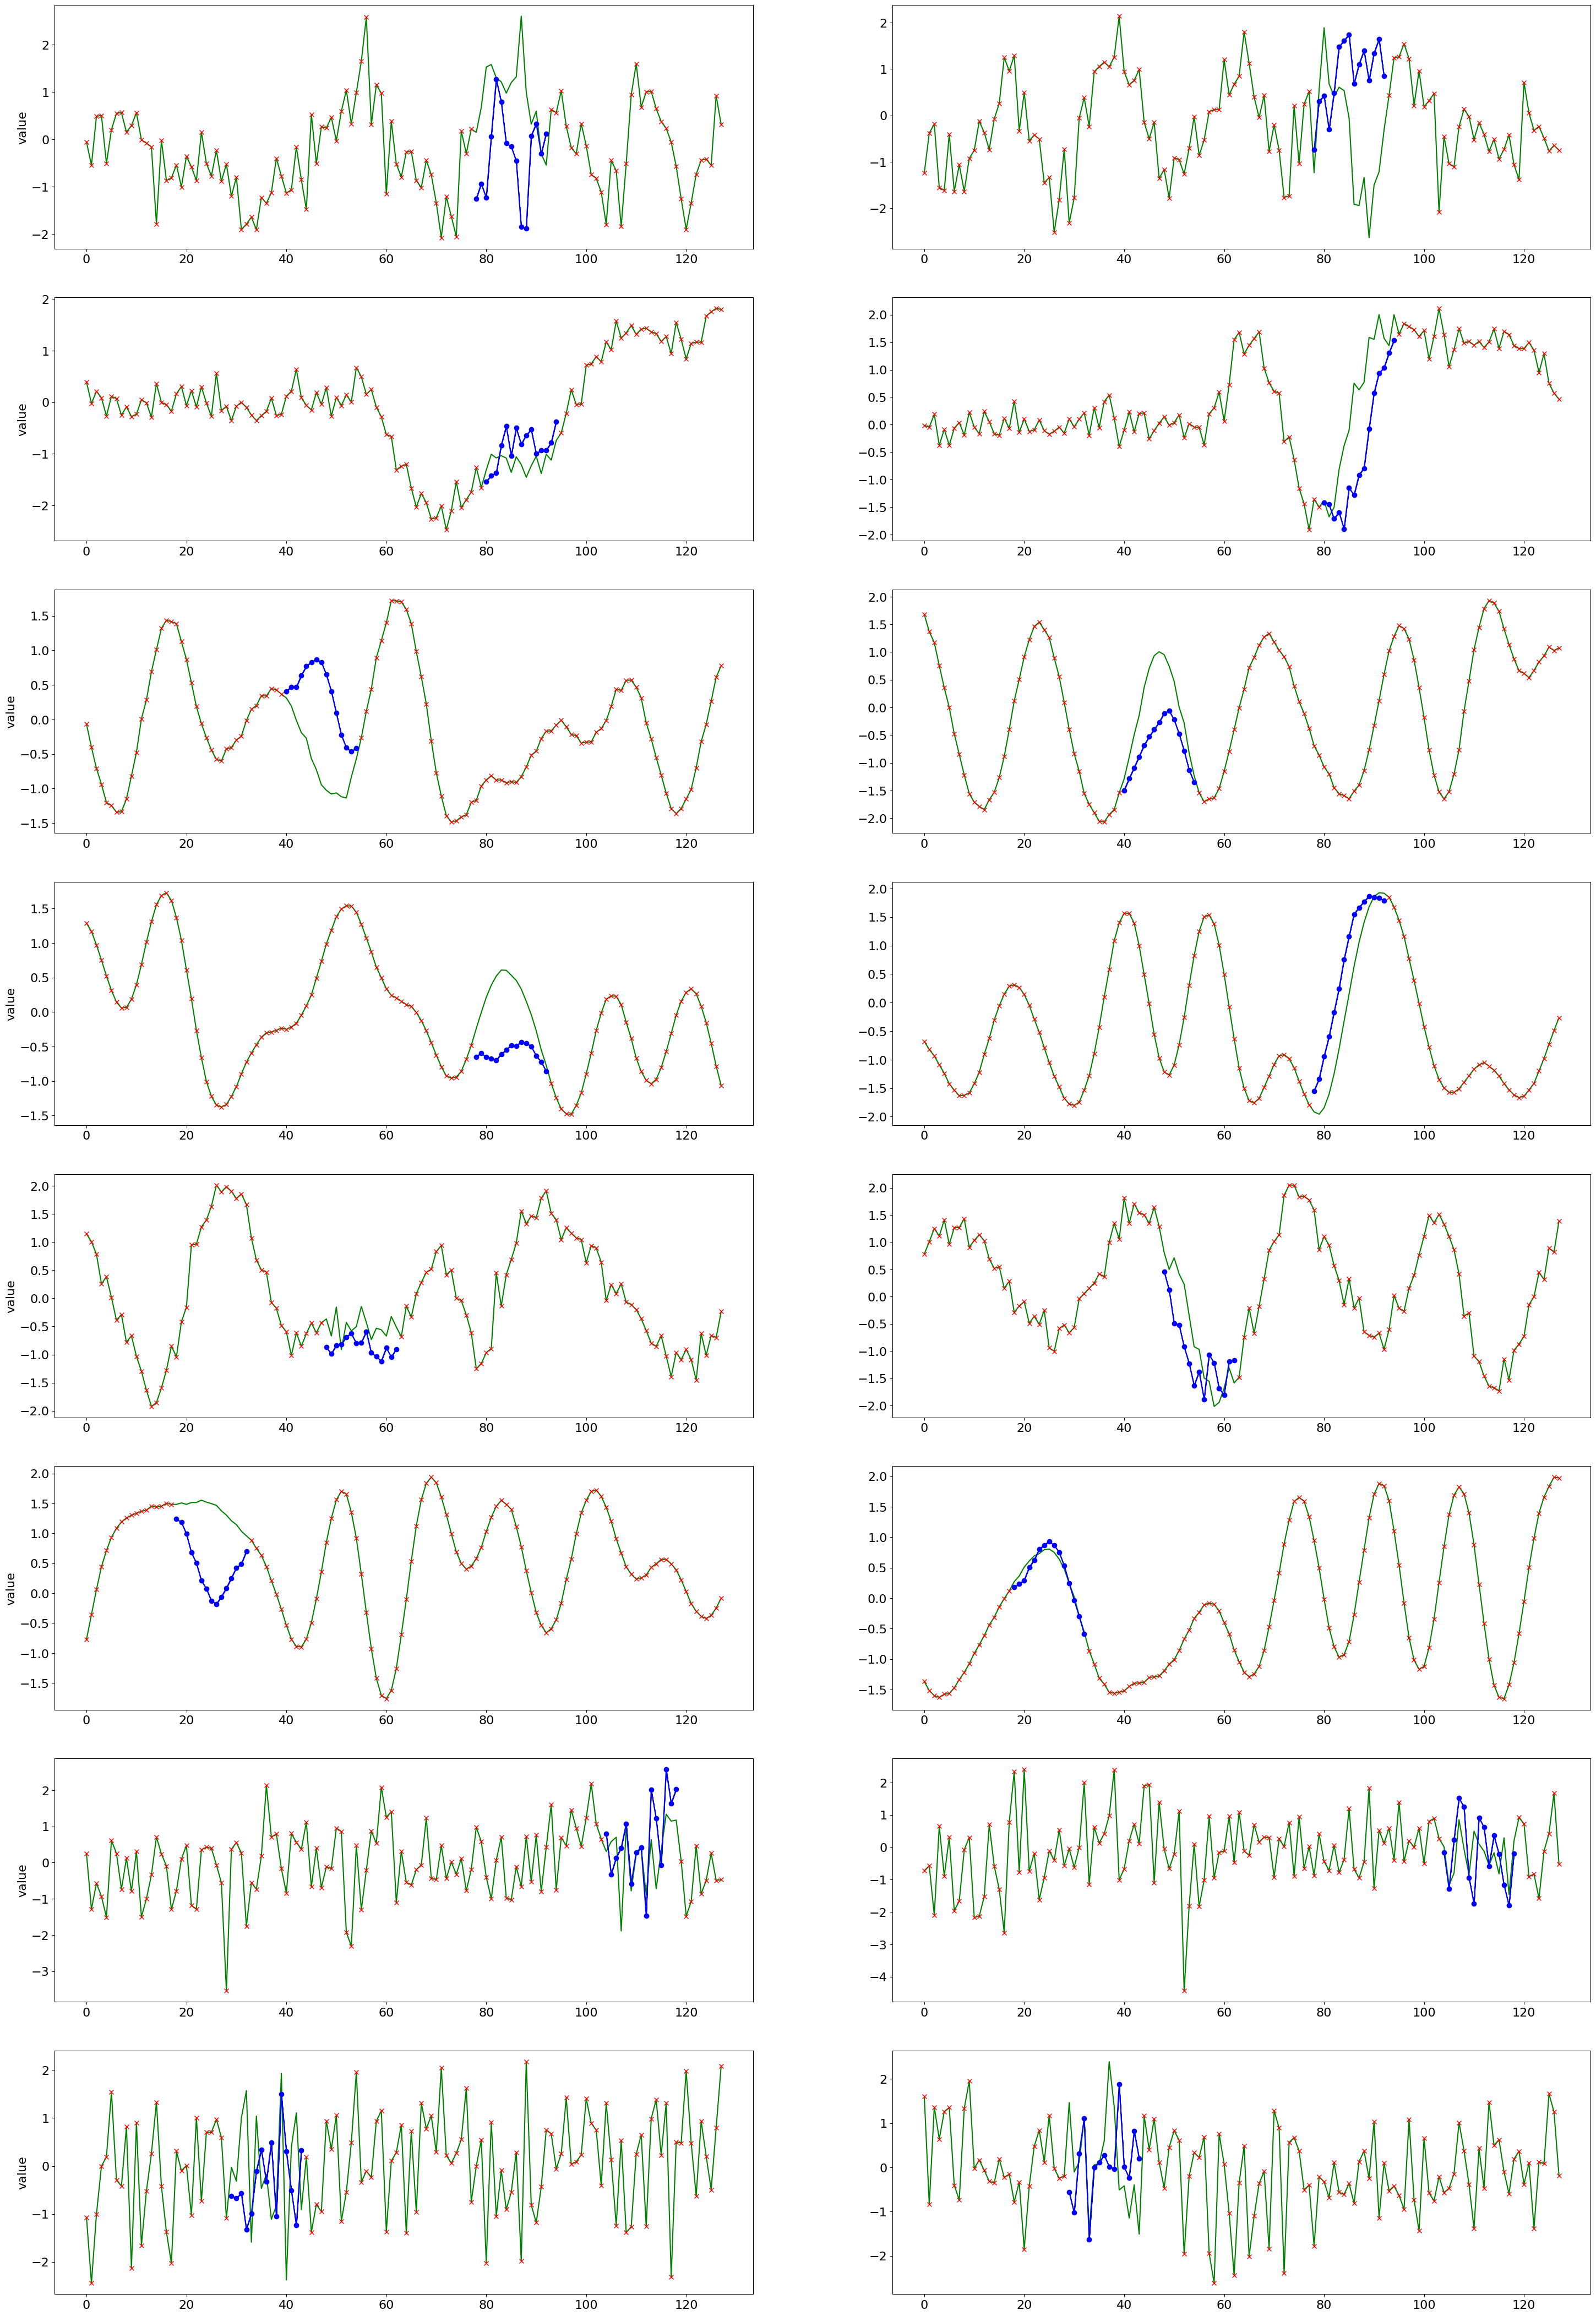

In [8]:
###healthcare###
sample_num = 8
dataind = 12000 #change to visualize a different time-series sample

plt.rcParams["font.size"] = 16
fig, axes = plt.subplots(nrows=sample_num, ncols=2,figsize=(36.0, 54.0))

for i in range(dataind, dataind+sample_num):
    for k in range(K):
        df = pd.DataFrame({"x":np.arange(0,L), "val":samples_np[i,0,:,k], "y":all_evalpoint_np[i,:,k]})
        df = df[df.y != 0]
        df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[i,:,k], "y":all_given_np[i,:,k]})
        df2 = df2[df2.y != 0]
        row = i - dataind
        col = k
        axes[row][col].plot(range(0,L), all_target_np[i,:,k], color = 'g',linestyle='solid',label='CSDI')
        # axes[row][col].plot(range(0,L), samples_np[i,0,:,k], color = 'g',linestyle='solid',label='CSDI')

        axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='solid')

        axes[row][col].fill_between(df.x, df.val, df.val, color='b', linestyle='solid',alpha=1)

        axes[row][col].plot(df2.x,df2.val, color = 'r',marker = 'x', linestyle='None')
        if col == 0:


            plt.setp(axes[row, 0], ylabel='value')
        if row == -1:
            plt.setp(axes[-1, col], xlabel='time')

